In [1]:
import gzip
import struct
import time
import matplotlib.pyplot as plt
from array import array as pyarray

from knn import *
from knn import KNNClassifier


In [2]:
kTestSet = [1, 3, 5, 7]
funcSet = [euclidean, manhattan, minkowski]
samplesSize = [10, 50, 100, 500, 1000, 2000,
               3000, 4000, 6000, 8000, 10000, 40000, 60000]
testSize = [500, 600, 700, 800, 900, 1000,
            3000, 4000, 6000, 8000, 9000, 10000, 10000]


In [3]:

def loadMNIST(imagePath, labelPath, size=1000, digits=np.arange(10)):
    """

    :param imagePath:
    :param labelPath:
    :param size:
    :param digits:
    :return:
    """
    N = size

    with gzip.open(labelPath, 'rb') as finf:
        magic_nr, size = struct.unpack(">II", finf.read(8))
        lbl = pyarray("b", finf.read())

        ind = [k for k in range(size) if lbl[k] in digits]
        labels = np.zeros((N, 1), dtype=np.int8)
        for i in range(N):
            labels[i] = lbl[ind[i]]
        finf.close()

    with gzip.open(imagePath, 'rb') as fimg:
        magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = pyarray("B", fimg.read())

        ind = [k for k in range(size) if lbl[k] in digits]
        images = np.zeros((N, rows * cols), dtype=np.uint8)

        for i in range(N):  # int(len(ind) * size/100.)):
            images[i] = np.array(img[ind[i] * rows * cols: (ind[i] + 1) * rows * cols]) \
                .reshape((rows * cols))

        fimg.close()

    labels = [label[0] for label in labels]
    return images, labels


MNISTImgTrain = "train-images-idx3-ubyte.gz"
MNISTLabelTrain = "train-labels-idx1-ubyte.gz"
MNISTImg = "t10k-images-idx3-ubyte.gz"
MNISTLabel = "t10k-labels-idx1-ubyte.gz"

# Test if the images are loaded correctly!
train_img, train_lbl = loadMNIST(MNISTImgTrain, MNISTLabelTrain, 5)


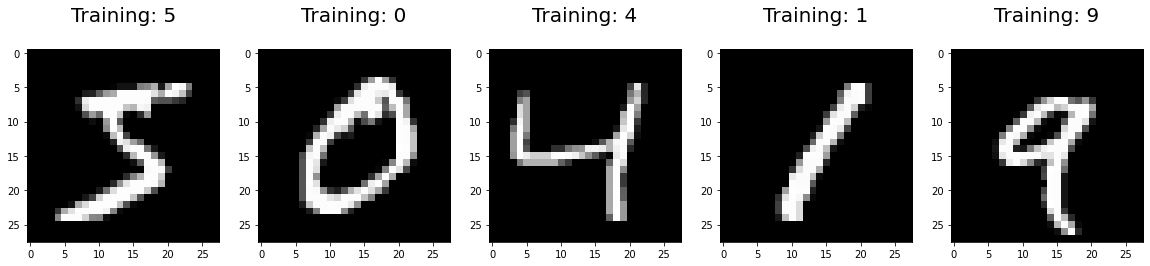

In [4]:


plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)
plt.show()


In [5]:

for s, t in zip(samplesSize[::-1], testSize):
    X, y = loadMNIST(MNISTImgTrain, MNISTLabelTrain, 60000)
    tX, ty = loadMNIST(MNISTImg, MNISTLabel, t)

    # Test data
    for func in funcSet:
        for k in kTestSet:
            ticks = time.time()
            accuracy = 0
            for trX, trY in zip(tX, ty):
                digit = KNNClassifier(X, y, trX, k, func)
                if digit == trY:
                    accuracy = accuracy + 1

            elapsedTime = time.time() - ticks
            print("elapsed time (seconds):", elapsedTime, "train:", len(X), "test:", len(ty), "distance-method:",
                  func.__name__, "k:",
                  k, "accuracy",
                  accuracy / len(ty))

    del X, y
    del tX, ty


elapsed time (seconds): 148.99325728416443 train: 60000 test: 500 distance-method: euclidean k: 1 accuracy 0.522
elapsed time (seconds): 149.69741582870483 train: 60000 test: 500 distance-method: euclidean k: 3 accuracy 0.482
elapsed time (seconds): 149.3719437122345 train: 60000 test: 500 distance-method: euclidean k: 5 accuracy 0.438
elapsed time (seconds): 147.69752430915833 train: 60000 test: 500 distance-method: euclidean k: 7 accuracy 0.428
elapsed time (seconds): 149.2197139263153 train: 60000 test: 500 distance-method: manhattan k: 1 accuracy 0.476
elapsed time (seconds): 147.69199132919312 train: 60000 test: 500 distance-method: manhattan k: 3 accuracy 0.426
elapsed time (seconds): 148.91162109375 train: 60000 test: 500 distance-method: manhattan k: 5 accuracy 0.394
elapsed time (seconds): 147.75855779647827 train: 60000 test: 500 distance-method: manhattan k: 7 accuracy 0.372
elapsed time (seconds): 265.5753593444824 train: 60000 test: 500 distance-method: minkowski k: 1 accu